In [1]:
import pandas as pd 
path = r'C:\Users\karol\myenv\myvenv\data\plosOnePsychologyMetrics.csv'#data downloaded before?28/06/2023? check github
data = pd.read_csv(path)
data.head()

,id,title,abstract,journal,publication_date,received_date,accepted_date,counter_total_all,counter_total_month
0,10.1371/journal.pone.0236792,The link between childhood psychological maltr...,"['\nBased on Attachment Theory, the Barlett an...",PLOS ONE,2020-09-03T00:00:00Z,2020-01-09T00:00:00Z,2020-07-06T00:00:00Z,2459,42
1,10.1371/journal.pone.0280457,"Need for affect, need for cognition, and the d...",['\nThe last decade has witnessed a significan...,PLOS ONE,2023-02-09T00:00:00Z,2021-10-08T00:00:00Z,2023-01-03T00:00:00Z,462,22
2,10.1371/journal.pone.0192907,The dominance of introspective measures and wh...,"['\nThe behavioral sciences, including most of...",PLOS ONE,2018-02-15T00:00:00Z,2016-11-16T00:00:00Z,2018-02-01T00:00:00Z,2424,11
3,10.1371/journal.pone.0224326,Does the psychological profile influence the p...,['\nStress control as well as other psychologi...,PLOS ONE,2019-11-12T00:00:00Z,2019-05-14T00:00:00Z,2019-10-11T00:00:00Z,2637,15
4,10.1371/journal.pone.0245671,The effect of perceived interracial competitio...,['\nThere remains a dearth of research on caus...,PLOS ONE,2021-01-29T00:00:00Z,2020-07-18T00:00:00Z,2021-01-05T00:00:00Z,2858,19


In [2]:
#REMOVE DUPLICATES
data[data['title'].duplicated(keep=False)].sort_values('title').head(8)

,id,title,abstract,journal,publication_date,received_date,accepted_date,counter_total_all,counter_total_month
38451,10.1371/journal.pone.0143086,(In)Consistencies in Responses to Sodium Bicar...,['Objectives: Intervention studies do not acco...,PLOS ONE,2015-11-17T00:00:00Z,2015-06-20T00:00:00Z,2015-10-29T00:00:00Z,3170,6
38396,10.1371/journal.pone.0143086,(In)Consistencies in Responses to Sodium Bicar...,['Objectives: Intervention studies do not acco...,PLOS ONE,2015-11-17T00:00:00Z,2015-06-20T00:00:00Z,2015-10-29T00:00:00Z,3170,6
37214,10.1371/journal.pone.0247292,A 1-week diet break improves muscle endurance ...,['\nAthletes undergoing energy restriction for...,PLOS ONE,2021-02-25T00:00:00Z,2020-09-14T00:00:00Z,2021-02-04T00:00:00Z,3012,16
37178,10.1371/journal.pone.0247292,A 1-week diet break improves muscle endurance ...,['\nAthletes undergoing energy restriction for...,PLOS ONE,2021-02-25T00:00:00Z,2020-09-14T00:00:00Z,2021-02-04T00:00:00Z,3012,16
28805,10.1371/journal.pctr.0020026,A Cluster-Randomised Trial Evaluating an Inter...,"[""Objective: Mental health problems often affe...",PLoS Clinical Trials,2007-06-01T00:00:00Z,2006-11-14T00:00:00Z,2007-04-02T00:00:00Z,8186,15
28791,10.1371/journal.pctr.0020026,A Cluster-Randomised Trial Evaluating an Inter...,"[""Objective: Mental health problems often affe...",PLoS Clinical Trials,2007-06-01T00:00:00Z,2006-11-14T00:00:00Z,2007-04-02T00:00:00Z,8186,15
36218,10.1371/journal.pone.0079652,"A Combination of Let-7d, Let-7g and Let-7i Ser...",['\n\t\t\t\tRecent studies have indicated that...,PLoS ONE,2013-11-05T00:00:00Z,2013-05-14T00:00:00Z,2013-10-03T00:00:00Z,5520,15
36172,10.1371/journal.pone.0079652,"A Combination of Let-7d, Let-7g and Let-7i Ser...",['\n\t\t\t\tRecent studies have indicated that...,PLoS ONE,2013-11-05T00:00:00Z,2013-05-14T00:00:00Z,2013-10-03T00:00:00Z,5520,15


In [3]:
data = data.drop_duplicates('title')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50474 entries, 0 to 52435
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   50474 non-null  object
 1   title                50474 non-null  object
 2   abstract             50474 non-null  object
 3   journal              49645 non-null  object
 4   publication_date     50474 non-null  object
 5   received_date        49115 non-null  object
 6   accepted_date        49111 non-null  object
 7   counter_total_all    50474 non-null  int64 
 8   counter_total_month  50474 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 3.9+ MB


In [4]:
#count views per day, from the download day
#date = 28/06/2023
#days_published = date - publication_date
#views_per_day =days_published/counter_total_all 

import pandas as pd
from datetime import datetime
import pytz

# Sample data
#data = {'publication_date': ['2020-09-03T00:00:00Z', '2022-03-15T00:00:00Z', '2021-11-28T00:00:00Z']}
#df = pd.DataFrame(data)

# Convert publication_date column to datetime type
data['publication_date'] = pd.to_datetime(data['publication_date'])

# Convert given_date to datetime type and localize to UTC timezone
given_date = datetime.strptime('28/06/2023', '%d/%m/%Y').replace(tzinfo=pytz.UTC)

# Calculate the difference in days
data['days_published'] = (given_date - data['publication_date']).dt.days

# We have an issue here in that if we divide days published by 0 we will get infinity.
# We should dump rows with 0 views

data = data[data['counter_total_all'] != 0]

data['views_per_day'] = data['counter_total_all']/data['days_published']

# Display the resulting dataframe
data.head()




,id,title,abstract,journal,publication_date,received_date,accepted_date,counter_total_all,counter_total_month,days_published,views_per_day
0,10.1371/journal.pone.0236792,The link between childhood psychological maltr...,"['\nBased on Attachment Theory, the Barlett an...",PLOS ONE,2020-09-03 00:00:00+00:00,2020-01-09T00:00:00Z,2020-07-06T00:00:00Z,2459,42,1028,2.392023
1,10.1371/journal.pone.0280457,"Need for affect, need for cognition, and the d...",['\nThe last decade has witnessed a significan...,PLOS ONE,2023-02-09 00:00:00+00:00,2021-10-08T00:00:00Z,2023-01-03T00:00:00Z,462,22,139,3.323741
2,10.1371/journal.pone.0192907,The dominance of introspective measures and wh...,"['\nThe behavioral sciences, including most of...",PLOS ONE,2018-02-15 00:00:00+00:00,2016-11-16T00:00:00Z,2018-02-01T00:00:00Z,2424,11,1959,1.237366
3,10.1371/journal.pone.0224326,Does the psychological profile influence the p...,['\nStress control as well as other psychologi...,PLOS ONE,2019-11-12 00:00:00+00:00,2019-05-14T00:00:00Z,2019-10-11T00:00:00Z,2637,15,1324,1.991692
4,10.1371/journal.pone.0245671,The effect of perceived interracial competitio...,['\nThere remains a dearth of research on caus...,PLOS ONE,2021-01-29 00:00:00+00:00,2020-07-18T00:00:00Z,2021-01-05T00:00:00Z,2858,19,880,3.247727


In [5]:
#calculate received_to_accepted_days
data['accepted_date'] = pd.to_datetime(data['accepted_date'])
data['received_date'] = pd.to_datetime(data['received_date'])
data['received_to_accepted_days'] = (data['accepted_date'] - data['received_date']).dt.days
#accepted to published days
data['accepted_to_published_days'] = (data['publication_date'] - data['accepted_date']).dt.days


data.head()

,id,title,abstract,journal,publication_date,received_date,accepted_date,counter_total_all,counter_total_month,days_published,views_per_day,received_to_accepted_days,accepted_to_published_days
0,10.1371/journal.pone.0236792,The link between childhood psychological maltr...,"['\nBased on Attachment Theory, the Barlett an...",PLOS ONE,2020-09-03 00:00:00+00:00,2020-01-09 00:00:00+00:00,2020-07-06 00:00:00+00:00,2459,42,1028,2.392023,179.0,59.0
1,10.1371/journal.pone.0280457,"Need for affect, need for cognition, and the d...",['\nThe last decade has witnessed a significan...,PLOS ONE,2023-02-09 00:00:00+00:00,2021-10-08 00:00:00+00:00,2023-01-03 00:00:00+00:00,462,22,139,3.323741,452.0,37.0
2,10.1371/journal.pone.0192907,The dominance of introspective measures and wh...,"['\nThe behavioral sciences, including most of...",PLOS ONE,2018-02-15 00:00:00+00:00,2016-11-16 00:00:00+00:00,2018-02-01 00:00:00+00:00,2424,11,1959,1.237366,442.0,14.0
3,10.1371/journal.pone.0224326,Does the psychological profile influence the p...,['\nStress control as well as other psychologi...,PLOS ONE,2019-11-12 00:00:00+00:00,2019-05-14 00:00:00+00:00,2019-10-11 00:00:00+00:00,2637,15,1324,1.991692,150.0,32.0
4,10.1371/journal.pone.0245671,The effect of perceived interracial competitio...,['\nThere remains a dearth of research on caus...,PLOS ONE,2021-01-29 00:00:00+00:00,2020-07-18 00:00:00+00:00,2021-01-05 00:00:00+00:00,2858,19,880,3.247727,171.0,24.0


In [6]:
import numpy as np
# Calculate the minimum and maximum values
y = data['views_per_day'].values
min_value = np.min(y)
max_value = np.max(y)

print("Minimum value:", min_value)
print("Maximum value:", max_value)

Minimum value: 0.005502751375687844
Maximum value: 3323.1552810688177


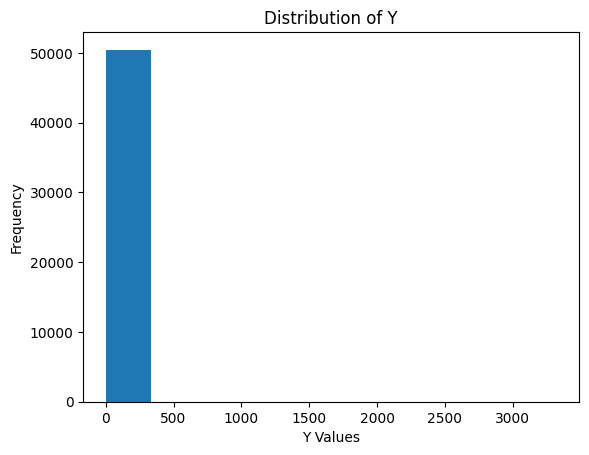

In [7]:

import matplotlib.pyplot as plt

# The distribution is very skewed

# Plotting the distribution of y

plt.hist(y, bins=10)  # Adjust the number of bins as needed
plt.xlabel('Y Values')
plt.ylabel('Frequency')
plt.title('Distribution of Y')
plt.show()

In [8]:
# numeric_only = True)
data.skew(axis = 0, skipna = True, numeric_only = True)
#weseedata is very skwwed

counter_total_all             182.815214
counter_total_month           118.022770
days_published                  0.240935
views_per_day                  95.120953
received_to_accepted_days       2.090939
accepted_to_published_days      5.748886
dtype: float64

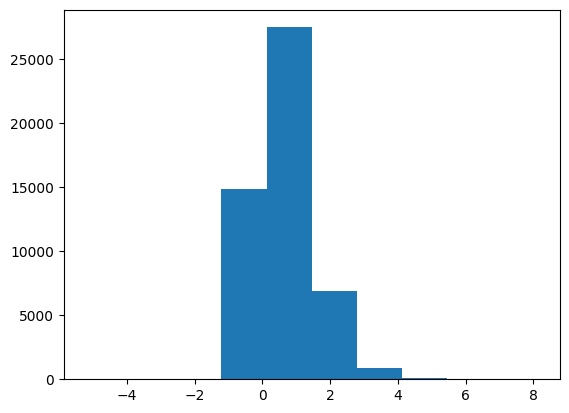

In [9]:
from scipy import stats
#try log transformation
plt.hist(np.log(data['views_per_day']))
#plt.hist(np.sqrt(data['views_per_day']))
#plt.hist(stats.boxcox(data['views_per_day']))
#plt.hist(data['views_per_day'])
plt.show()

In [10]:
#Let's find outliers


# Calculate the quartiles
Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)

# Calculate the IQR
IQR = Q3 - Q1

# Define a threshold for outlier detection (e.g., 1.5 times the IQR)
threshold = 10

# Identify outliers
outliers = y[(y < Q1 - threshold * IQR) | (y > Q3 + threshold * IQR)]

# Print the outliers
print("Outliers:", outliers)

Outliers: [  47.40282885   42.38016529   38.56928214  295.64904552   57.13651274
   40.37066284   34.44532803   38.56338028   55.65714286   24.82118189
  128.46578631   56.54549675  129.41422333   41.98126065   29.75725407
   94.68441558   25.73447537 1145.40603645   25.34188511   35.14285714
   34.28262826   38.32884097   50.77777778   34.86579967   36.44930268
   26.5          33.95535714   24.22132797   30.09980431   33.76623377
   24.21767363  168.67765568  120.1131815    24.76785714   27.30183221
   46.93056943 1196.47437296  253.72894737   24.70974155   31.75638507
   31.90156394   28.59821429   27.75         93.93531958   45.89689902
   46.04710145   39.52037471   41.63466334   34.63559322   45.32408759
   38.08816596  201.0907173    28.36220472   38.52077922   46.75795843
   47.67791798   26.39906441   27.82022472   26.07142857   25.30365297
   57.9707887    23.82563025   28.           26.42336683   37.12676056
   24.74137931   57.99390244   24.26819923   33.42756184   32.97647

In [11]:
#Let's look at the most viewed papers
top_10_papers = data.nlargest(20, 'views_per_day')

# Print the rows of the top 10 papers
pd.set_option('display.max_colwidth', None)
print(top_10_papers['title'], top_10_papers['views_per_day'], top_10_papers['publication_date'])


9861                                                                                                                              Glass Shape Influences Consumption Rate for Alcoholic Beverages
26930                                                                              Health literacy and associated factors among undergraduates: A university-based cross-sectional study in Nepal
1108                                                                                                                             Diurnal variations of psychometric indicators in Twitter content
364                                                                                                      Loneliness predicts a preference for larger interpersonal distance within intimate space
23285                                                                                 Women’s techniques for pleasure from anal touch: Results from a U.S. probability sample of women ages 18–93
12782                         

Let's try different types of transformation to deal with the skewness. First we need to remove the outliers but worth analysing them separately later.

5.199021151609961
0.39136428970142756


Text(-3.8055555555555554, 0.5, 'frequency')

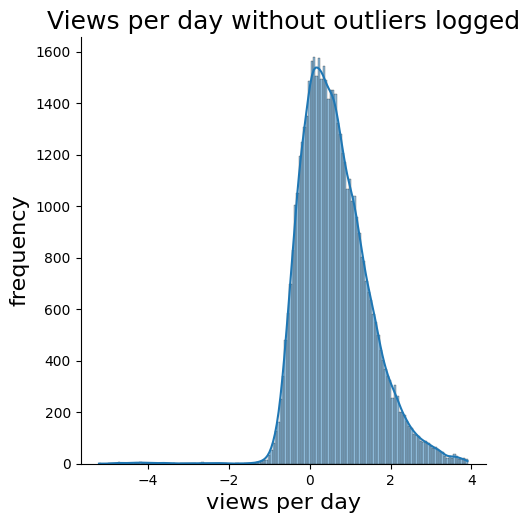

In [12]:
#!pip install seaborn
import seaborn as sns 
no_outliers_df = data[data['views_per_day'] < 50]
#plt.hist(no_outliers_df['views_per_day'], bins=50)
#plt.hist(np.sqrt(no_outliers_df['views_per_day']))
#plt.hist(stats.boxcox(no_outliers_df['views_per_day']))
#plt.hist(np.log(no_outliers_df['views_per_day']))
#plt.show()
print(no_outliers_df['views_per_day'].skew())

no_outliers_df_log = np.log(no_outliers_df['views_per_day'])
print(no_outliers_df_log.skew())



#sns.distplot(no_outliers_df['views_per_day'])
sns.displot(no_outliers_df_log, kde=True)
plt.title('Views per day without outliers logged', fontsize=18)
plt.xlabel('views per day', fontsize=16)
plt.ylabel('frequency', fontsize=16)

2.4153057025747593


Text(-3.6805555555555554, 0.5, 'frequency')

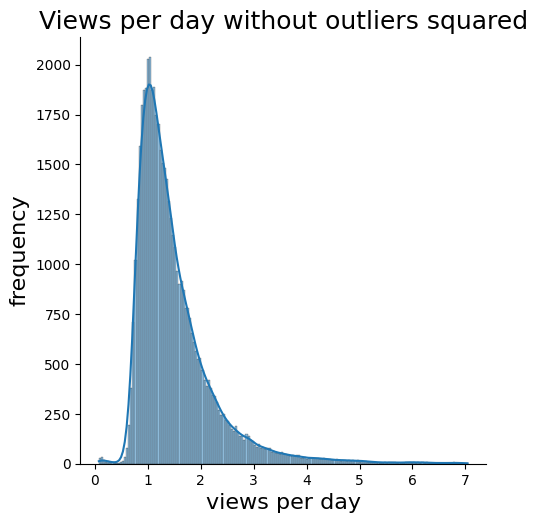

In [13]:
no_outliers_df_sqrt = np.sqrt(no_outliers_df['views_per_day'])
print(no_outliers_df_sqrt.skew())
sns.displot(no_outliers_df_sqrt, kde=True)
plt.title('Views per day without outliers squared', fontsize=18)
plt.xlabel('views per day', fontsize=16)
plt.ylabel('frequency', fontsize=16)

-0.07283373285908652


Text(-3.8055555555555554, 0.5, 'frequency')

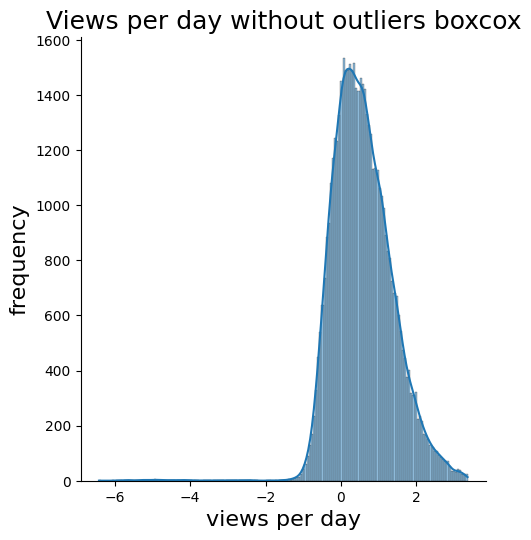

In [14]:
#let's also try box cox
no_outliers_df_boxcox = stats.boxcox(no_outliers_df['views_per_day'])[0]#get first value of the tuple
print(pd.Series(no_outliers_df_boxcox).skew())
sns.displot(no_outliers_df_boxcox, kde=True)
plt.title('Views per day without outliers boxcox', fontsize=18)
plt.xlabel('views per day', fontsize=16)
plt.ylabel('frequency', fontsize=16)

In [15]:
#create dataframe with boxcox data
#no_outliers_df['boxcox_views_per_day'] = stats.boxcox(no_outliers_df['views_per_day'])[0]
no_outliers_df.loc[:, 'boxcox_views_per_day'] = stats.boxcox(no_outliers_df['views_per_day'])[0]



C:\Users\karol\AppData\Local\Temp\ipykernel_23288\2404008611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_df.loc[:, 'boxcox_views_per_day'] = stats.boxcox(no_outliers_df['views_per_day'])[0]


In [16]:
import sys

print(sys.maxsize)

9223372036854775807


Let's try to use a simple regression as a baseline model

In [17]:
from sklearn.model_selection import train_test_split

abstracts = no_outliers_df['abstract'].values
y = no_outliers_df['views_per_day'].values

abstracts_train, abstracts_test, y_train, y_test = train_test_split(abstracts, y, test_size=0.2, random_state=1000)

## The below take ages

Best results with boxcox transormation

In [18]:
# import numpy as np
# from sentence_transformers import SentenceTransformer


# #docs = ['the influence of human activity on the warming of the climate system has evolved from theory to established fact', 
# #        'cats can jump 5 times their own height']

# model = SentenceTransformer('all-MiniLM-L6-v2')
# #docs = data['titleText'].values
# vectorized_abstracts_BERT_train = model.encode(np.asarray(abstracts_train))
# print("Shape:", vectorized_abstracts_BERT_train.shape)
# #takes a long tm=ime

In [19]:
# vectorized_abstracts_BERT_test = model.encode(np.asarray(abstracts_test))
# print("Shape:", vectorized_abstracts_BERT_test.shape)

In [20]:
# from sklearn.linear_model import LinearRegression

# regression = LinearRegression()
# regression.fit(vectorized_abstracts_BERT_train, y_train)
# score = regression.score(vectorized_abstracts_BERT_test, y_test)

# print("Accuracy:", score)

In [21]:
#not very good
#try a more advanced NN model 

## Let's try with TF-IDF vectorization and titles

In [43]:
titles = no_outliers_df['title'].values
y = no_outliers_df['views_per_day'].values

titles_train, titles_test, y_train, y_test = train_test_split(titles, y, test_size=0.2, random_state=1000)

In [45]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers

# vocab_size = 20000
# X = df["text"]
# text_vectorizer = layers.TextVectorization(max_tokens=config.vocab_size, output_mode="tf-idf", ngrams=2)
# # Index the bigrams and learn the TF-IDF weights via `adapt()`
# with tf.device("CPU"):
#     # A bug that prevents this from running on GPU for now.
#     text_vectorizer.adapt(X)

max_features = 10000
#sequence_length = 250

vectorize_layer = layers.TextVectorization(
    max_tokens=max_features,
    output_mode="tf-idf", 
    ngrams=2
    #output_sequence_length=sequence_length)
)

In [46]:
# Make a text-only dataset (without labels), then call adapt

vectorize_layer.adapt(titles_train)

In [47]:
sample = vectorize_layer(titles_train[0:3])
sample.shape
#because max features was 10000

TensorShape([3, 10000])

In [48]:
def vectorize_text(text):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text)

# retrieve a batch (of 32 reviews and labels) from the dataset

first_title= titles_train[0]
print("Title:", first_title)
print("Vectorized review", vectorize_text(first_title))

Title: Weight Change Is a Characteristic Non-Motor Symptom in Drug-Naïve Parkinson’s Disease Patients with Non-Tremor Dominant Subtype: A Nation-Wide Observational Study
Vectorized review tf.Tensor(
[[115.061806    0.          1.0521923 ...   0.          0.
    0.       ]], shape=(1, 10000), dtype=float32)


In [49]:
#!pip install keras
import keras
model = keras.Sequential([
        keras.Input(shape=(1, ), dtype="string"), #has to be shape 1
        vectorize_layer,
        layers.Dense(256, activation="relu", kernel_regularizer="l2"),
        layers.Dense(32, activation="relu", kernel_regularizer="l2"),
        layers.Dense(1)
    ])
model.compile(optimizer="adam", loss='mean_absolute_error')

model.summary()


# horsepower_model = tf.keras.Sequential([
#     horsepower_normalizer,
#     layers.Dense(units=1)
# ])

# horsepower_model.summary()
# ----
# input_dim = vectorize_text.shape[1]  # Number of features

# model = keras.Sequential()
# model.add(keras.layers.Dense(10, input_dim=input_dim, activation='relu'))
# model.add(keras.layers.Dense(1, activation='sigmoid'))
# --
#  Set up the network
# #
# network = models.Sequential()
# network.add(layers.Dense(24, activation='relu', input_shape=(13,)))
# network.add(layers.Dense(32, activation='relu'))
# network.add(layers.Dense(1))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (Text  (None, 10000)             1         
 Vectorization)                                                  
                                                                 
 dense_6 (Dense)             (None, 256)               2560256   
                                                                 
 dense_7 (Dense)             (None, 32)                8224      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2568514 (9.80 MB)
Trainable params: 2568513 (9.80 MB)
Non-trainable params: 1 (8.00 Byte)
_________________________________________________________________


In [51]:
#Run the untrained model on the first 10 'Horsepower' values. The output won't be good
model.predict(titles_train[:10])

1/1 [==============================] - 0s 134ms/step


array([[0.64978224],
       [0.6588214 ],
       [0.5515628 ],
       [0.2553554 ],
       [0.21067703],
       [0.82286274],
       [2.1070242 ],
       [0.13304472],
       [0.23812473],
       [0.48587614]], dtype=float32)

In [52]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = model.fit(
    titles_train,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)